<a href="https://colab.research.google.com/github/sjkim-audio/audio-dsp-lab/blob/main/notebooks_03_Audio_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Audio Length: 14.84 seconds


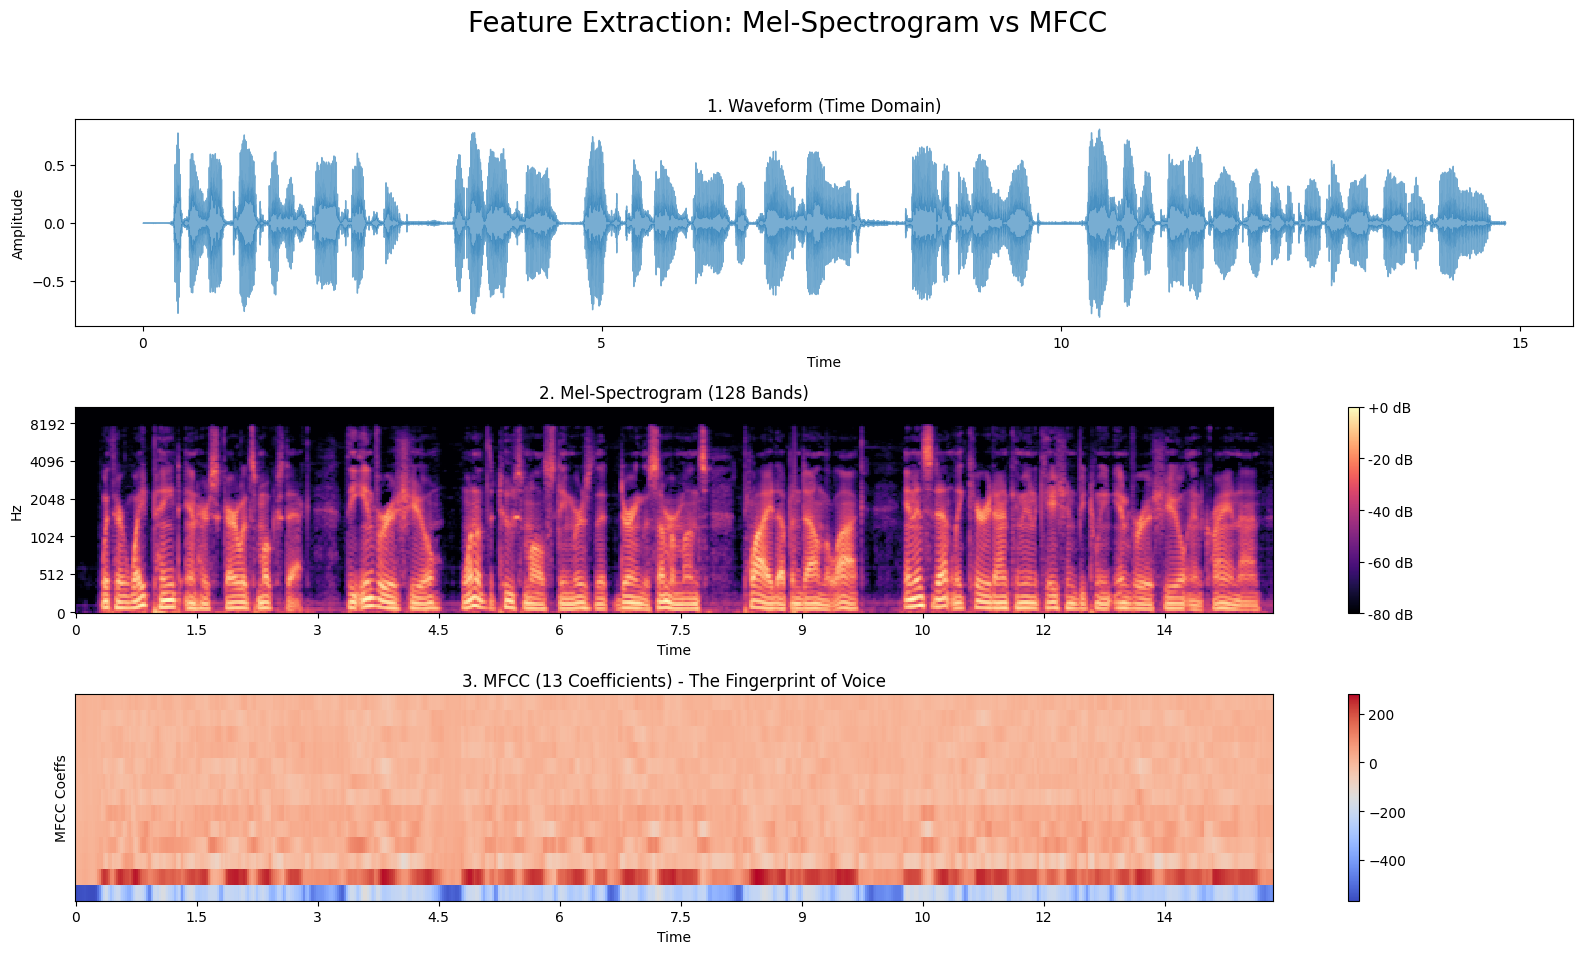

Mel-Spectrogram Shape: (128, 640) (Vertical 128)
MFCC Shape:            (13, 640) (Vertical 13) -> 압축 효과!


In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# 1. 데이터 로드 (사람의 음성)
# MFCC는 음성 인식(Speech Recognition)에서 가장 많이 쓰이므로 음성 데이터를 사용합니다.
filename = librosa.ex('libri1')
y, sr = librosa.load(filename)

print(f"Audio Length: {len(y)/sr:.2f} seconds")
# ipd.Audio(y, rate=sr) # 코랩에서 소리 들어보기

plt.figure(figsize=(16, 10))
plt.suptitle('Feature Extraction: Mel-Spectrogram vs MFCC', fontsize=20)

# --- Step 1: Waveform ---
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.title('1. Waveform (Time Domain)')
plt.ylabel('Amplitude')

# --- Step 2: Mel-Spectrogram ---
# 인간의 청각 특성을 반영했지만, 여전히 데이터 차원이 큽니다 (예: 128개 주파수 밴드)
plt.subplot(3, 1, 2)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('2. Mel-Spectrogram (128 Bands)')

# --- Step 3: MFCC (Mel-Frequency Cepstral Coefficients) ---
# 멜-스펙트로그램을 한 번 더 압축하여 '소리의 껍데기(음색)'만 남긴 것입니다.
# 보통 13개 ~ 20개의 계수(Coefficients)만 사용합니다.
plt.subplot(3, 1, 3)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('3. MFCC (13 Coefficients) - The Fingerprint of Voice')
plt.ylabel('MFCC Coeffs')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 데이터 크기 비교 출력
print(f"Mel-Spectrogram Shape: {S.shape} (Vertical 128)")
print(f"MFCC Shape:            {mfccs.shape} (Vertical 13) -> 압축 효과!")